# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [6]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 250

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 250 total reviews
Scraping page 2
   ---> 500 total reviews
Scraping page 3
   ---> 750 total reviews
Scraping page 4
   ---> 1000 total reviews
Scraping page 5
   ---> 1250 total reviews
Scraping page 6
   ---> 1500 total reviews
Scraping page 7
   ---> 1750 total reviews
Scraping page 8
   ---> 2000 total reviews
Scraping page 9
   ---> 2250 total reviews
Scraping page 10
   ---> 2500 total reviews


In [7]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Excellent service both on th...
1,✅ Trip Verified | Good lounge at Cape Town. O...
2,✅ Trip Verified | A really excellent journey....
3,✅ Trip Verified | This flight was one of the ...
4,Not Verified | It seems that there is a race t...


In [8]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

## Data Cleaning

In [52]:
#load the scraped dataser
df = pd.read_csv("C:\\Users\\akint\\Downloads\\British Airways project\\BA_reviews.csv")

In [12]:
df.head()

,reviews
0,✅ Trip Verified | Excellent service both on th...
1,✅ Trip Verified | Good lounge at Cape Town. O...
2,✅ Trip Verified | A really excellent journey....
3,✅ Trip Verified | This flight was one of the ...
4,Not Verified | It seems that there is a race t...


Now, we will remove the first set of characters (i.e. Trip verified/ Not Verified)

In [14]:
# Define the column and the character to remove before
column = 'reviews'
character = '|'

# Remove all characters before the specified character
df[column] = df[column].apply(lambda x: x.split(character, 1)[-1])

# Print the updated column
print(df[column])

0        Excellent service both on the ground and on b...
1         Good lounge at Cape Town. On time departure....
2         A really excellent journey. Lounge not overc...
3         This flight was one of the worst I have ever...
4        It seems that there is a race to the bottom a...
                              ...                        
2495    Worst experience I've ever had in an airport, ...
2496    British Airways Economy on a Boeing 777, Londo...
2497    The Concorde Lounge is a long way in the termi...
2498    My British Airways return trip from Milan to V...
2499    I have flown regularly with British Airways be...
Name: reviews, Length: 2500, dtype: object


In [15]:
df.head()

,reviews
0,Excellent service both on the ground and on b...
1,Good lounge at Cape Town. On time departure....
2,A really excellent journey. Lounge not overc...
3,This flight was one of the worst I have ever...
4,It seems that there is a race to the bottom a...


It looks great now

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  2500 non-null   object
dtypes: object(1)
memory usage: 19.7+ KB


In [18]:
#checking for nulls
df.isnull().sum()

reviews    0
dtype: int64

There are no nulls in our dataset

## Data PreProcessing

Here we will tokenize the reviews and remove stop words

In [24]:
import nltk

In [25]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [26]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords



In [27]:
# Define the column to tokenize
column = 'reviews'

# Tokenize the column
df[column] = df[column].apply(word_tokenize)

# Define the stop words
stop_words = set(stopwords.words("english"))

# Remove the stop words
df[column] = df[column].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# Print the updated column
print(df[column])


0       [Excellent, service, ground, board, -, first, ...
1       [Good, lounge, Cape, Town, ., time, departure,...
2       [really, excellent, journey, ., Lounge, overcr...
3       [flight, one, worst, ever, life, ., wanted, pa...
4       [seems, race, bottom, amongst, airlines, ., ev...
                              ...                        
2495    [Worst, experience, 've, ever, airport, ,, poo...
2496    [British, Airways, Economy, Boeing, 777, ,, Lo...
2497    [Concorde, Lounge, long, way, terminal, ,, que...
2498    [British, Airways, return, trip, Milan, Vancou...
2499    [flown, regularly, British, Airways, UK, Europ...
Name: reviews, Length: 2500, dtype: object


In [28]:
df.head()

,reviews
0,"[Excellent, service, ground, board, -, first, ..."
1,"[Good, lounge, Cape, Town, ., time, departure,..."
2,"[really, excellent, journey, ., Lounge, overcr..."
3,"[flight, one, worst, ever, life, ., wanted, pa..."
4,"[seems, race, bottom, amongst, airlines, ., ev..."


Now, we will lemmatize to obtain root words

In [30]:
from nltk.stem import WordNetLemmatizer
# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize the column
df[column] = df[column].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Print the updated column
print(df[column])

0       [Excellent, service, ground, board, -, first, ...
1       [Good, lounge, Cape, Town, ., time, departure,...
2       [really, excellent, journey, ., Lounge, overcr...
3       [flight, one, worst, ever, life, ., wanted, pa...
4       [seems, race, bottom, amongst, airline, ., eve...
                              ...                        
2495    [Worst, experience, 've, ever, airport, ,, poo...
2496    [British, Airways, Economy, Boeing, 777, ,, Lo...
2497    [Concorde, Lounge, long, way, terminal, ,, que...
2498    [British, Airways, return, trip, Milan, Vancou...
2499    [flown, regularly, British, Airways, UK, Europ...
Name: reviews, Length: 2500, dtype: object


In [31]:
df.head()

,reviews
0,"[Excellent, service, ground, board, -, first, ..."
1,"[Good, lounge, Cape, Town, ., time, departure,..."
2,"[really, excellent, journey, ., Lounge, overcr..."
3,"[flight, one, worst, ever, life, ., wanted, pa..."
4,"[seems, race, bottom, amongst, airline, ., eve..."


Now we will obtain the polarity of each review and create a word cloud

In [33]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Determine the polarity of the column
df['polarity'] = df[column].apply(lambda x: TextBlob(" ".join(x)).sentiment.polarity)



In [34]:
df.head()

,reviews,polarity
0,"[Excellent, service, ground, board, -, first, ...",0.311905
1,"[Good, lounge, Cape, Town, ., time, departure,...",0.260000
2,"[really, excellent, journey, ., Lounge, overcr...",0.245059
3,"[flight, one, worst, ever, life, ., wanted, pa...",-0.052760
4,"[seems, race, bottom, amongst, airline, ., eve...",-0.142500


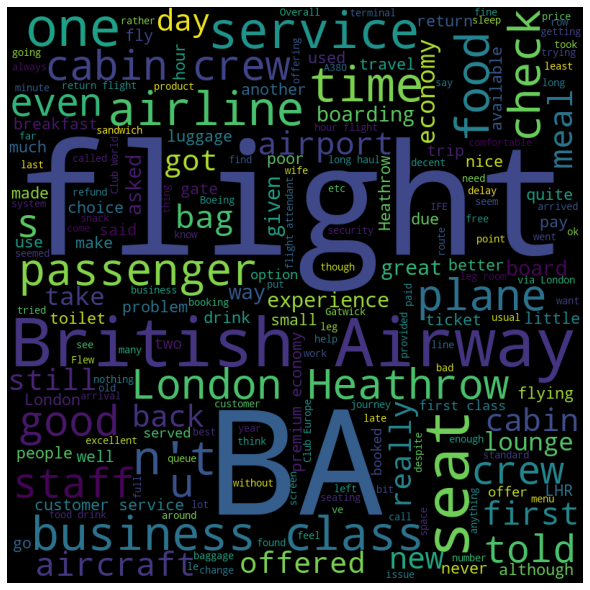

In [35]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, min_font_size=10).generate(" ".join(df[column].apply(lambda x: " ".join(x))))

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


We will compare the amount of positive and negative reviews obtain by Bristish Airways

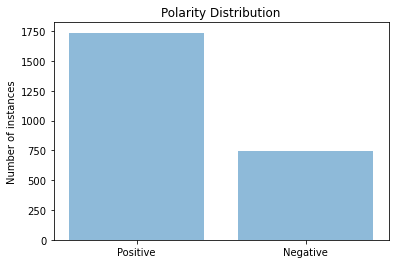

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Determine the number of positive and negative polarity
positive = df[df['polarity'] > 0].shape[0]
negative = df[df['polarity'] < 0].shape[0]

# Plot the bar chart
polarity = ('Positive', 'Negative')
y_pos = np.arange(len(polarity))
values = [positive, negative]
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, polarity)
plt.ylabel('Number of instances')
plt.title('Polarity Distribution')
plt.show()


In [44]:
positive

1737

In [46]:
1737/2500*100

69.48

Approximately 70% of reviews analysed are postive reviews

In [47]:
negative

746

Approximately 30% of reviews analysed are negative reviews

In [49]:
746/2500*100

29.84

The worst review 

In [41]:
df.polarity.min()

-0.7666666666666666

In [42]:
df[df.polarity < -0.76]

,reviews,polarity
583,"[Mykonos, London, flight, delayed, waiting, de...",-0.766667


In [54]:
#let's take a look at the worst review
df1=df.copy()
df1.reviews[583]

'✅ Trip Verified |  Mykonos to London flight delayed and waiting to depart. They are not on time, be prepared to miss your connections, take off 2 hours late,. The staff is some of the worst I have had on airlines. You may be stuck on the runway and they won’t offer you any water.  The worst business class experience I have had. '